# ANN for make simulation and make prediction in physics

# import working liberary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import RMSprop
from keras.models import load_model
import numpy as np

# global variables

In [2]:
# input variable to program
#inputFile = 'datasets/collect data_pi-modified.xlsx'
inputFile = 'All data mesons+baryons.xlsx'
inputSheetName = 'Sheet1'


# read data

In [3]:
# Read the data from the excel file
data_all = pd.read_excel(inputFile,sheet_name=inputSheetName)
temp_data_all = data_all[data_all['spectrum']<60]
data =temp_data_all.reset_index(drop=True)

# Split the data into input and output variables
X = data[['mass','s','N part','Pt']]
y = data['spectrum'].to_frame('spectrum')

print(X.head)
print(y.head)

<bound method NDFrame.head of          mass     s  N part     Pt
0     0.13957   7.7     337  0.425
1     0.13957   7.7     337  0.475
2     0.13957   7.7     337  0.525
3     0.13957   7.7     337  0.575
4     0.13957   7.7     337  0.625
...       ...   ...     ...    ...
6445  0.93827  39.0      14  1.550
6446  0.93827  39.0      14  1.650
6447  0.93827  39.0      14  1.750
6448  0.93827  39.0      14  1.850
6449  0.93827  39.0      14  1.950

[6450 rows x 4 columns]>
<bound method NDFrame.head of       spectrum
0      46.3708
1      34.7823
2      26.3221
3      19.7093
4      15.0548
...        ...
6445    0.0073
6446    0.0049
6447    0.0034
6448    0.0023
6449    0.0016

[6450 rows x 1 columns]>


# normaliz input

In [4]:
# Normalize the input
from sklearn.preprocessing import RobustScaler
# Create a RobustScaler object
scaler = RobustScaler()
# Fit the scaler to the input data and transform it
X_normalized = scaler.fit_transform(X)
# Print the normalized input data
print('X_normalized')
print(X_normalized)
X_train = X_normalized
#X_train = X
print('X_train')
print(X_train) 


X_normalized
[[-0.4433542  -0.76774194  1.22702703 -0.40625   ]
 [-0.4433542  -0.76774194  1.22702703 -0.34375   ]
 [-0.4433542  -0.76774194  1.22702703 -0.28125   ]
 ...
 [ 0.5566458   1.2516129  -0.51891892  1.25      ]
 [ 0.5566458   1.2516129  -0.51891892  1.375     ]
 [ 0.5566458   1.2516129  -0.51891892  1.5       ]]
X_train
[[-0.4433542  -0.76774194  1.22702703 -0.40625   ]
 [-0.4433542  -0.76774194  1.22702703 -0.34375   ]
 [-0.4433542  -0.76774194  1.22702703 -0.28125   ]
 ...
 [ 0.5566458   1.2516129  -0.51891892  1.25      ]
 [ 0.5566458   1.2516129  -0.51891892  1.375     ]
 [ 0.5566458   1.2516129  -0.51891892  1.5       ]]


# loada saved model

In [5]:
# Load the saved model
modelName = 'correction_mass_test-11-6-2023-8L-100-16-RMSE73.h5'
myepochs = int(100) 
mybatchSize = int(16)
model = load_model(modelName)
#configure output parameters
outputFile = 'out_in4- '+modelName+' .xlsx'
summaryOutFile = modelName + ' - Summary .txt'
outputSheetName = 'predicat_in4-good -  '+modelName+' '
nameFigImg = 'fig_in4- '+modelName+' .png'

# define the model - compile - fit - save

In [6]:

''' Define the model '''
""" # Define the model
model = Sequential(name=modelName)
# Add the first dense layer
model.add(Dense(40, input_dim=4, activation='relu'))

# Add batch normalization
#model.add(BatchNormalization())
model.add(Dense(40, activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(80, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))

# Add the output layer
model.add(Dense(1))

''' # compile the model      '''
# Compile the model with Levenberg-Marquardt optimizer
optimizer = RMSprop(learning_rate=0.001, rho=0.001,)
model.compile(loss='mean_squared_error', optimizer=optimizer)

''' train the model & save current compiled model  '''
# Train the model
#model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)
model.fit(X_train, y, epochs=myepochs, batch_size=mybatchSize) 
# Save the model
model.save(modelName)


 """

" # Define the model\nmodel = Sequential(name=modelName)\n# Add the first dense layer\nmodel.add(Dense(40, input_dim=4, activation='relu'))\n\n# Add batch normalization\n#model.add(BatchNormalization())\nmodel.add(Dense(40, activation='relu'))\n#model.add(BatchNormalization())\nmodel.add(Dense(80, activation='relu'))\nmodel.add(Dense(80, activation='relu'))\nmodel.add(Dense(40, activation='relu'))\nmodel.add(Dense(40, activation='relu'))\n\n# Add the output layer\nmodel.add(Dense(1))\n\n''' # compile the model      '''\n# Compile the model with Levenberg-Marquardt optimizer\noptimizer = RMSprop(learning_rate=0.001, rho=0.001,)\nmodel.compile(loss='mean_squared_error', optimizer=optimizer)\n\n''' train the model & save current compiled model  '''\n# Train the model\n#model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)\nmodel.fit(X_train, y, epochs=myepochs, batch_size=mybatchSize) \n# Save the model\nmodel.save(modelName)\n\n\n "

# Evaluate the model and make prediction 

In [7]:
from sklearn.metrics import mean_squared_error

# Make predictions on new data
X_test =pd.DataFrame(X_train) #scaler.transform(X)
#X_test = scaler.fit_transform(X)
print("new_data is : ")
print(X_test)
predictions = model.predict(X_test)
predictions = predictions.flatten()
predictions = pd.Series(predictions)
predictions = predictions.to_frame('predictions')
print("predictions is : ")
print(predictions)

# Evaluate the model
score = model.evaluate(X_test, y)
print("score " , score)
print(score)
mse = mean_squared_error(y,predictions)
print('mse' , mse)


new_data is : 
             0         1         2        3
0    -0.443354 -0.767742  1.227027 -0.40625
1    -0.443354 -0.767742  1.227027 -0.34375
2    -0.443354 -0.767742  1.227027 -0.28125
3    -0.443354 -0.767742  1.227027 -0.21875
4    -0.443354 -0.767742  1.227027 -0.15625
...        ...       ...       ...      ...
6445  0.556646  1.251613 -0.518919  1.00000
6446  0.556646  1.251613 -0.518919  1.12500
6447  0.556646  1.251613 -0.518919  1.25000
6448  0.556646  1.251613 -0.518919  1.37500
6449  0.556646  1.251613 -0.518919  1.50000

[6450 rows x 4 columns]
202/202 [==============================] - 0s 634us/step
predictions is : 
      predictions
0       52.990440
1       41.761189
2       31.448595
3       23.168550
4       16.961763
...           ...
6445     0.082357
6446     0.068873
6447     0.024958
6448     0.007881
6449    -0.010559

[6450 rows x 1 columns]
202/202 [==============================] - 0s 688us/step - loss: 2.9453
score  2.945286273956299
2.945286273956299
m

# draw 

shape of datap (6450, 8)
data : 
          mass     s  N part     Pt  spectrum     err1     err2
0     0.13957   7.7     337  0.425   46.3708  0.11247  3.01883
1     0.13957   7.7     337  0.475   34.7823  0.09267  2.24990
2     0.13957   7.7     337  0.525   26.3221  0.07704  1.69598
3     0.13957   7.7     337  0.575   19.7093  0.06396  1.26704
4     0.13957   7.7     337  0.625   15.0548  0.05379  0.96702
...       ...   ...     ...    ...       ...      ...      ...
6445  0.93827  39.0      14  1.550    0.0073  0.00008  0.00070
6446  0.93827  39.0      14  1.650    0.0049  0.00007  0.00057
6447  0.93827  39.0      14  1.750    0.0034  0.00005  0.00039
6448  0.93827  39.0      14  1.850    0.0023  0.00004  0.00026
6449  0.93827  39.0      14  1.950    0.0016  0.00003  0.00018

[6450 rows x 7 columns]
pred 
        predictions
0       52.990440
1       41.761189
2       31.448595
3       23.168550
4       16.961763
...           ...
6445     0.082357
6446     0.068873
6447     0.0249

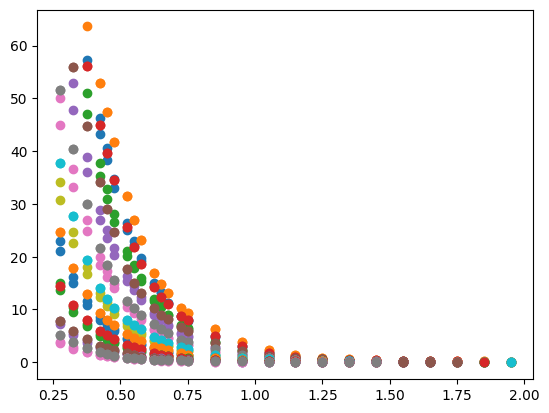

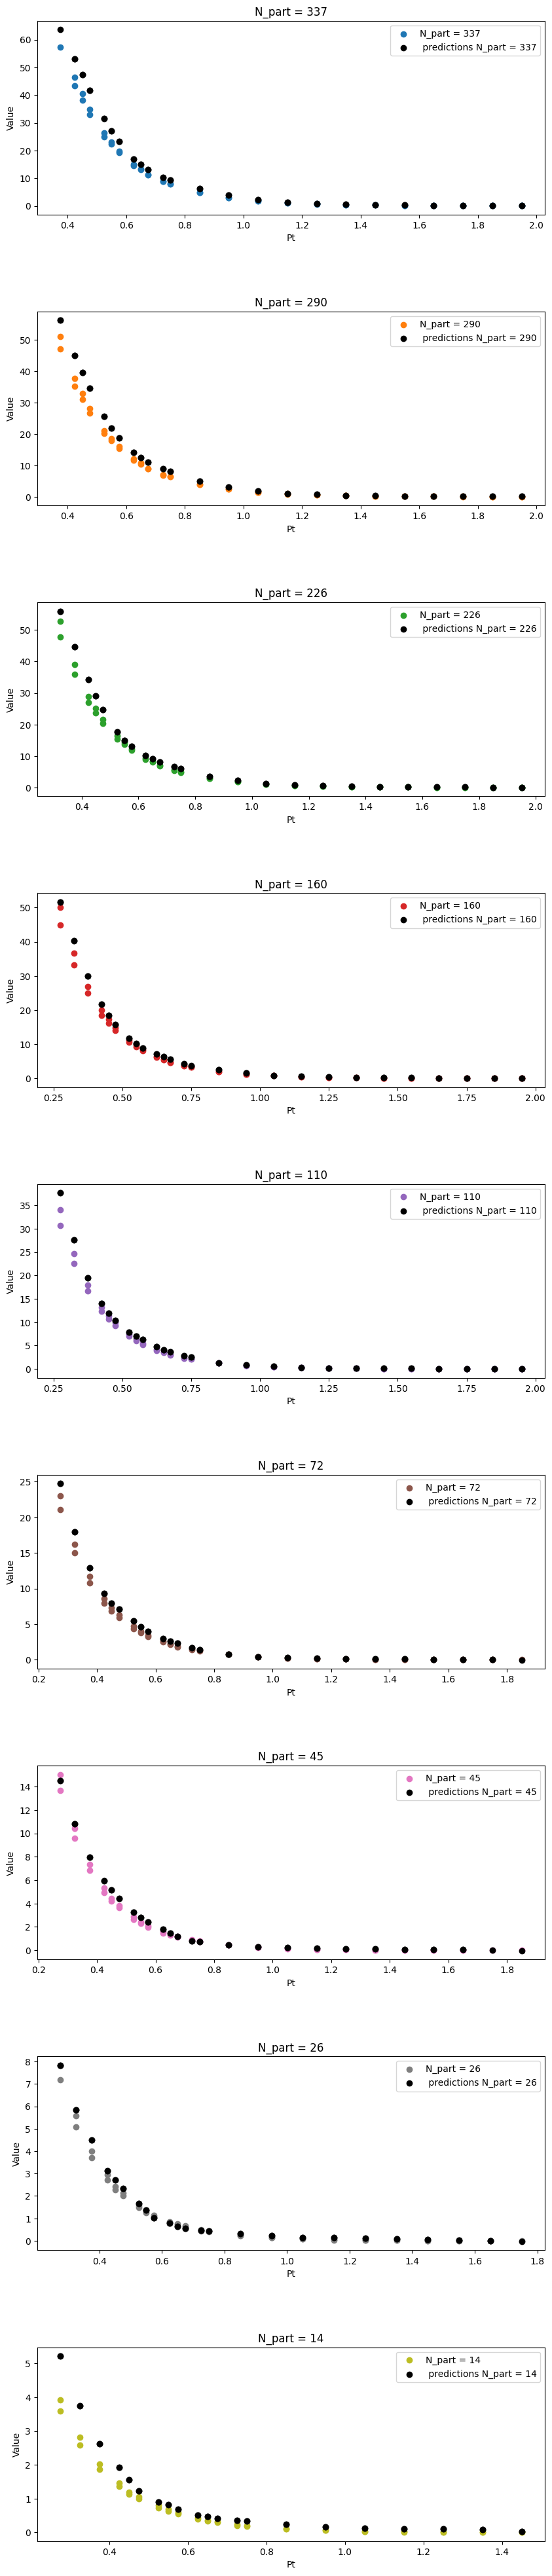

In [8]:
# for drawing in 2d i choose Pt as x-axis
error = data['spectrum'] - predictions['predictions']
error = error.to_frame('error')
#print('shape of data' , data.shape)
#print('shape of pred' , predictions.shape)
#datap = pd.concat([data,predictions],axis=1)
datap = pd.merge(data,predictions,left_index=True, right_index=True)
print('shape of datap',datap.shape)

print('data : \n',data)
print('pred \n ',predictions)
print('datap \n',datap)

# xap : data
xap = pd.DataFrame(datap)
# xapf : xap after filteration
xapf= pd.DataFrame(datap)
xapf = xapf[xapf['mass']==0.13957]
xapf = xapf[xapf['s']==7.7]
#xapf = xapf[xapf['N part']==337]

N_Part_Values  =  xapf['N part'].unique()
print('Npart values : \n')
for n in N_Part_Values:
    print('N is : ',n)
print('Npart values : \n',N_Part_Values)
dataGraph1 = pd.merge(xapf['Pt'],xapf['predictions'],left_index=True, right_index=True)
print('datagraph1 : \n',dataGraph1)
dataGraph = pd.merge(dataGraph1,xapf['spectrum'],left_index=True, right_index=True)
print('dataGraph : \n', dataGraph)
print('shape of dataGraph',dataGraph.shape)
# Plot the data and predictions
mergedData = pd.merge(dataGraph,xapf['N part'],left_index=True, right_index=True)
print('merged data is : \n',mergedData)
#plt.semilogy(xapf['Pt'], xapf['spectrum']   ,'bo', label='Actual')
#plt.semilogy(xapf['Pt'], xapf['predictions'],'ro', label='Predicted')
for n in N_Part_Values:
    plt.scatter(mergedData['Pt'][mergedData['N part']==n],mergedData['spectrum'][mergedData['N part']==n])
    plt.scatter(mergedData['Pt'][mergedData['N part']==n],mergedData['predictions'][mergedData['N part']==n])
    
    #print('n test :\n',mergedData['Pt'][mergedData['N part']==n])
plt.savefig("fig-all-"+nameFigImg)
##########
import matplotlib.pyplot as plt
# Define the list ofValues and plot the data for each iteration
# Create a figure with two subplots
fig, axs = plt.subplots(nrows=len(N_Part_Values), ncols=1, figsize=(10, 50))

#fig, axs = plt.subplots(N_Part_Values.size,1)
for i, n in enumerate(N_Part_Values):
    # Plot the 'Pt' column where N_part == n
    axs[i].scatter(mergedData['Pt'][mergedData['N part'] == n], 
                 mergedData['spectrum'][mergedData['N part'] == n], 
                 color='C{}'.format(i), 
                 label='N_part = {}'.format(n))

    # Plot the 'predictions' column where N_part == n
    axs[i].scatter(mergedData['Pt'][mergedData['N part'] == n], 
                 mergedData['predictions'][mergedData['N part'] == n], 
                 color='black', 
                  label=' predictions N_part = {}'.format(n))
                 #label='_nolegend_')

    # Add a legend and axis labels to the subplot
    axs[i].legend()
    axs[i].set_xlabel('Pt')
    axs[i].set_ylabel('Value')
    axs[i].set_title('N_part = {}'.format(n))

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.savefig(nameFigImg)
plt.show()


# write output to excel 

In [9]:
# Write predictions , data to Excel file
err1=data['err1'].to_frame('err1')
err2=data['err2'].to_frame('err2')
#SquareErrorForEachPoint = np.sqrt( ((datap['predictions']- datap['Spectrum'])/(err1- err2)))
SquareErrorForEachPoint =np.square( (datap['predictions']- datap['spectrum'])/(err1['err1']+ err2['err2']))

SquareErrorForEachPoint = pd.Series(SquareErrorForEachPoint)
SquareErrorForEachPoint = SquareErrorForEachPoint.to_frame('SquareErrorForEachPoint')
print('Square error for each point : ',SquareErrorForEachPoint)

outputpredicat = pd.concat([datap, SquareErrorForEachPoint], axis=1)
mysum =outputpredicat['SquareErrorForEachPoint'].sum()
mycount =(outputpredicat['SquareErrorForEachPoint'].count()) -1
rmse = np.sqrt(mysum/mycount)

#rmse = np.sqrt (np.average(outputpredicat['SquareErrorForEachPoint']))
rmse = pd.Series(rmse)
#rmse = pd.DataFrame({'rmse': rmse})
print('RMSE',rmse)

# output is data frame
#print(outputpredicat.head(10))
# Write the DataFrames to an Excel file with three sheets
with pd.ExcelWriter(outputFile) as writer:
    outputpredicat.to_excel(writer, sheet_name=outputSheetName, index=False)
    rmse.to_excel(writer, sheet_name='RMSE', index=False)


Square error for each point :        SquareErrorForEachPoint
0                    4.469093
1                    8.875388
2                    8.360145
3                    6.754729
4                    3.489754
...                       ...
6445              9259.724729
6446              9991.472163
6447              2400.454918
6448               346.135838
6449              3352.315547

[6450 rows x 1 columns]
RMSE 0    73.389399
dtype: float64


d:\Repos\ReposEda\DrSamahPrjs\ANN\ANN\.venv\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


# print model summery 

In [10]:

print("End")
#print("accuracy :" + str(accuracy))
print("score " + str(score))
SummaryOut = model.summary()
print(SummaryOut)

from io import StringIO
# summarize the model
with StringIO() as buf:
    model.summary(print_fn=lambda x: buf.write(x + '\n'))
    summary = buf.getvalue()

with open(modelName +'-summary.txt', 'w') as f:
    f.write(summary)


print(summary)
print(modelName)
print('RMSE',rmse)



End
score 2.945286273956299
Model: "correction_mass_test-11-6-2023-8L-100-16.h5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 40)                200       
                                                                 
 dense_15 (Dense)            (None, 40)                1640      
                                                                 
 dense_16 (Dense)            (None, 80)                3280      
                                                                 
 dense_17 (Dense)            (None, 80)                6480      
                                                                 
 dense_18 (Dense)            (None, 40)                3240      
                                                                 
 dense_19 (Dense)            (None, 40)                1640      
                                                             